In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

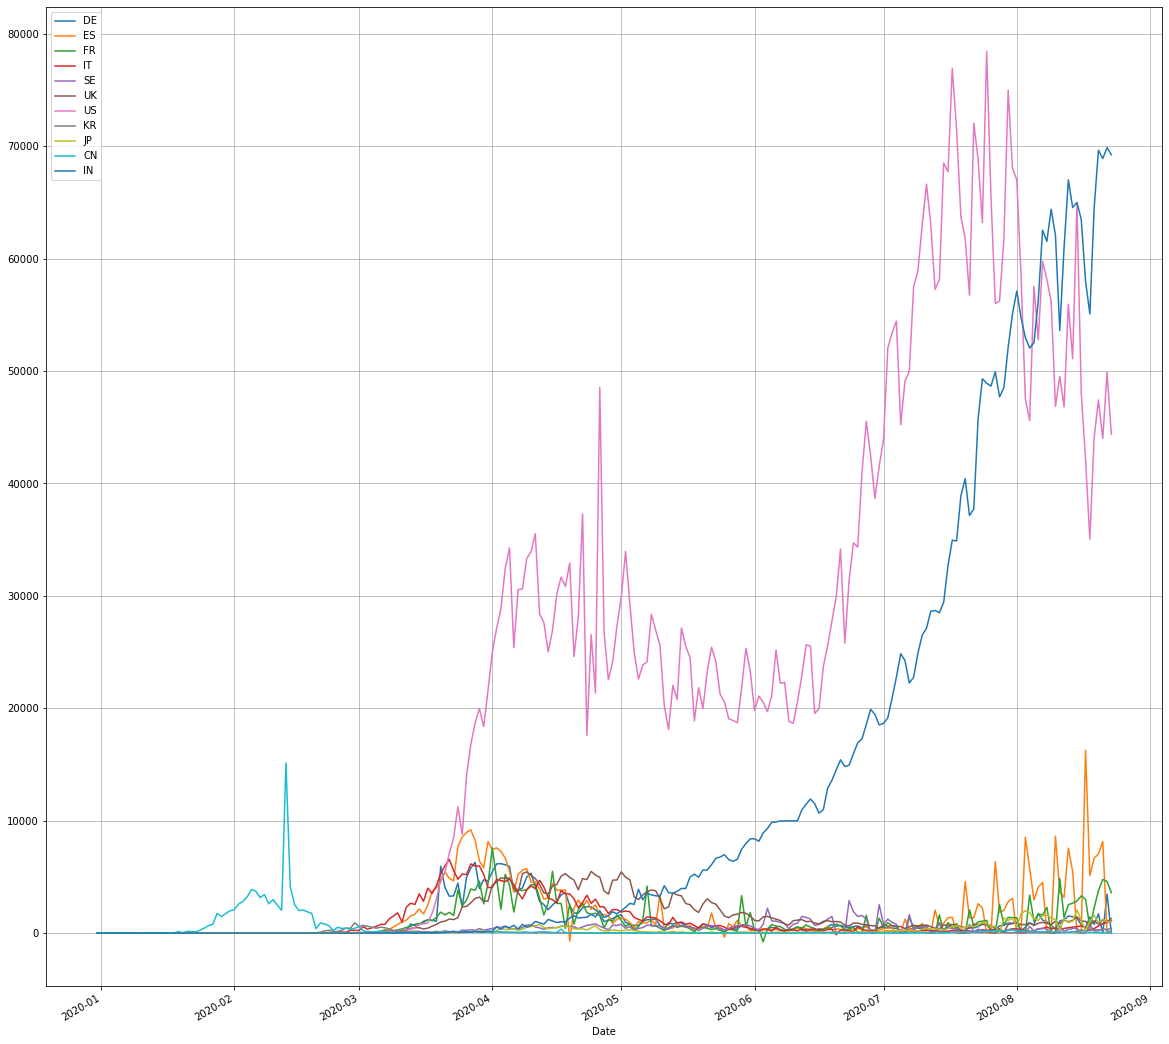

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

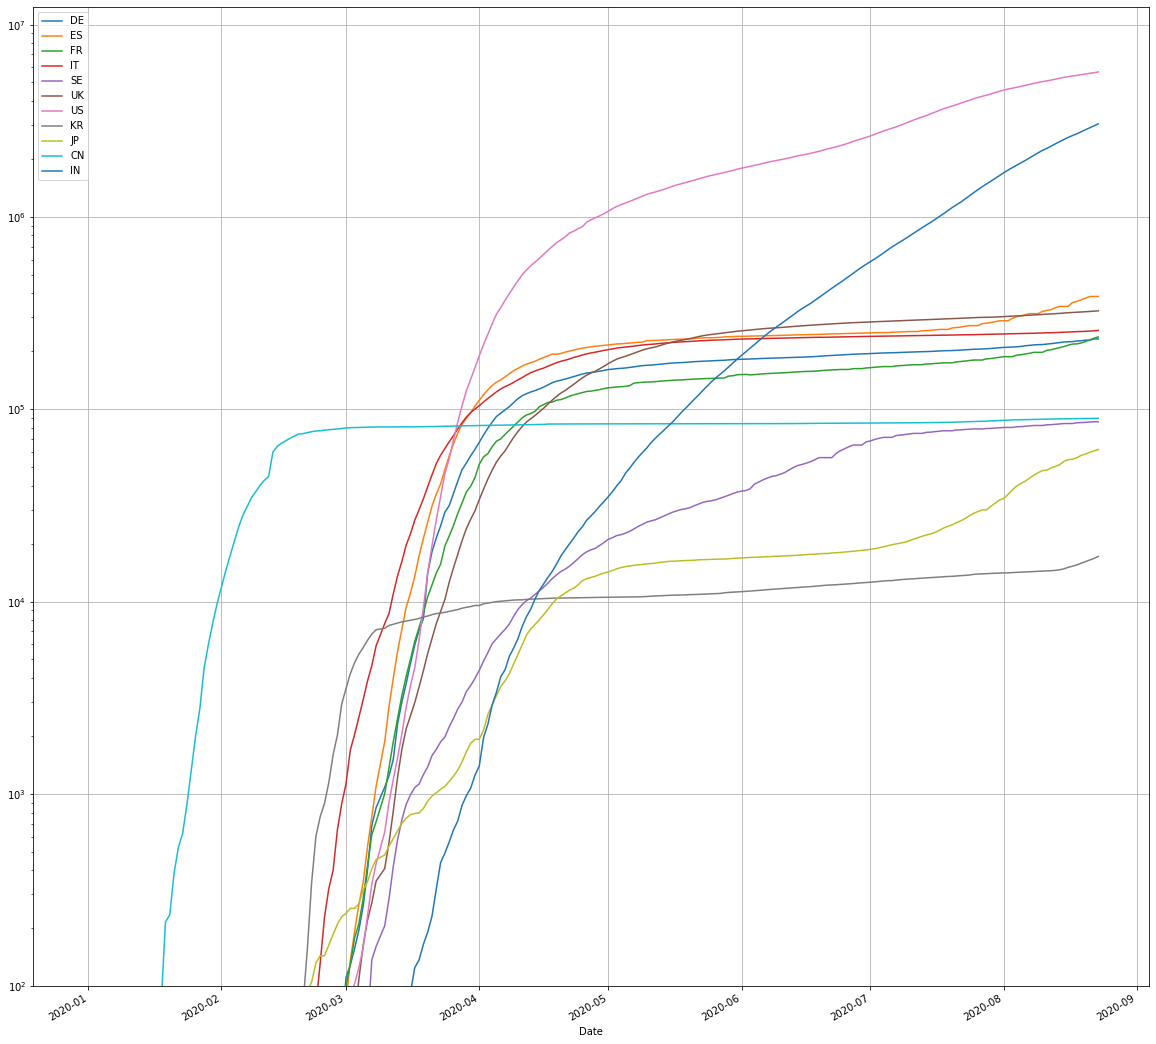

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

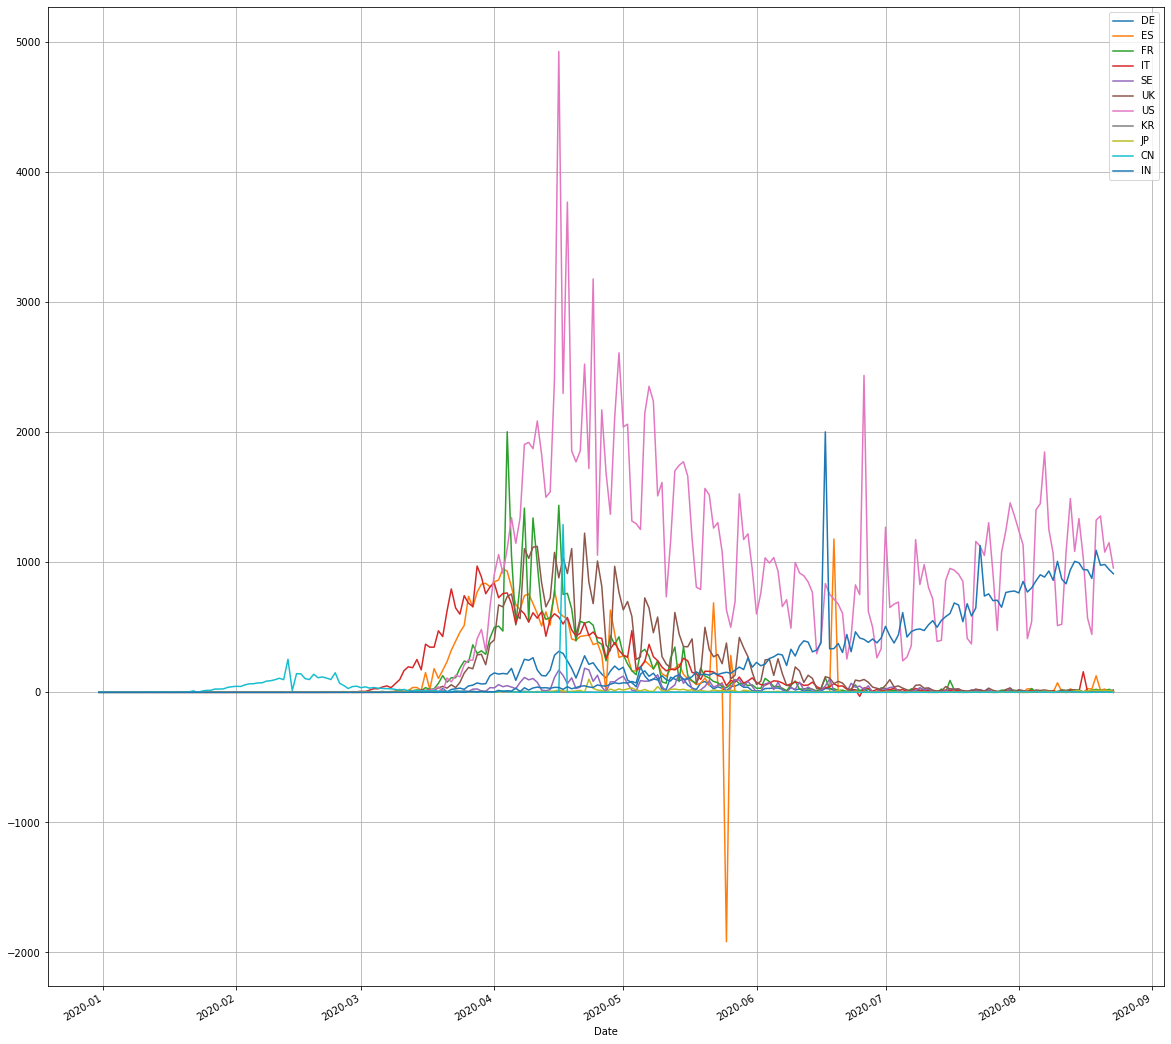

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

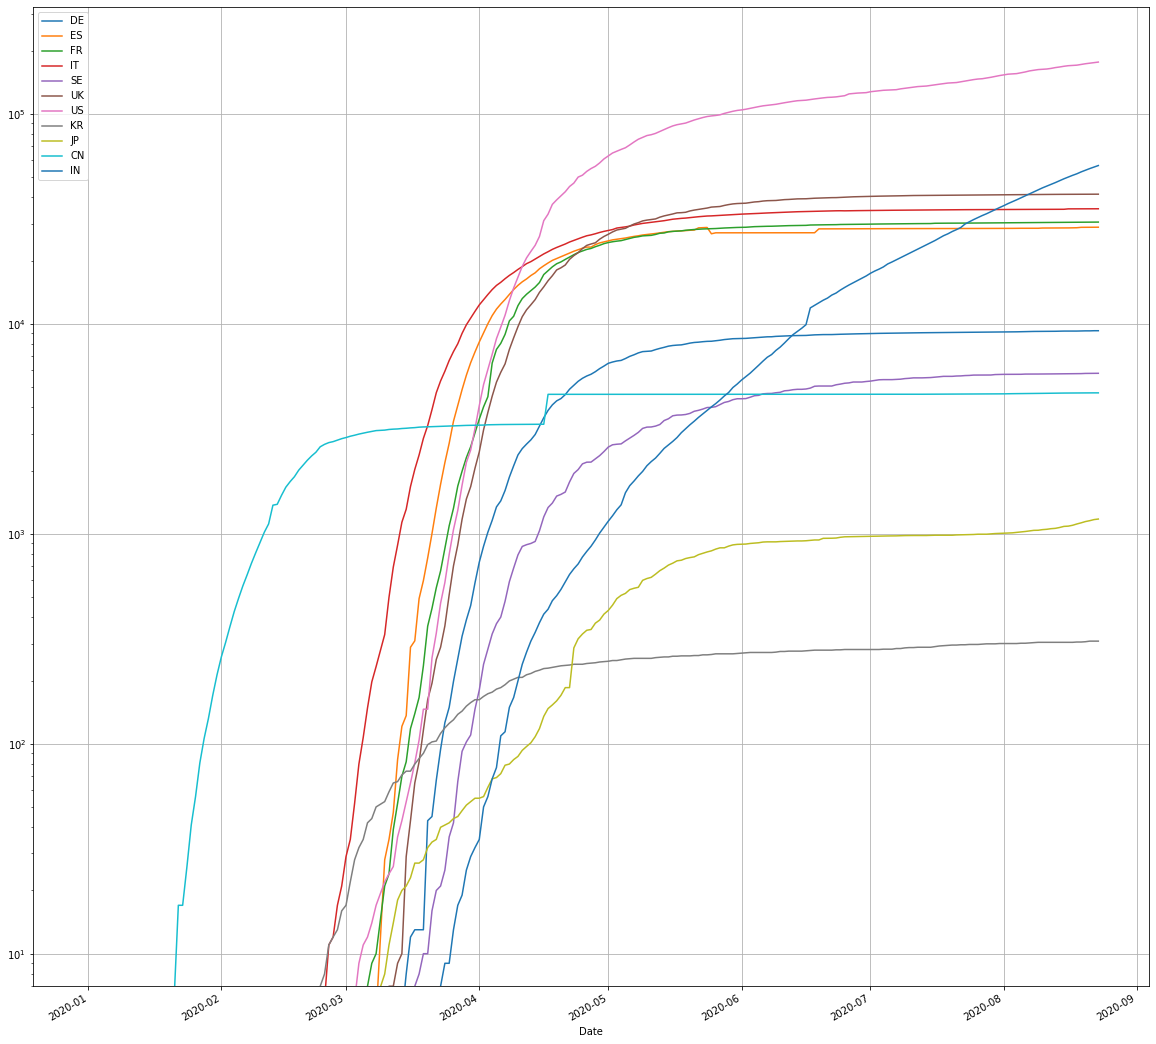

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-08-09,704.0,0.0,0,347,0,758,56221,36,1344,92,64399
12,2020-08-10,317.0,8618.0,0,463,0,1062,46847,28,1207,121,62064
11,2020-08-11,1079.0,3632.0,4854,259,649,816,49530,34,248,113,53601
10,2020-08-12,1182.0,3172.0,1397,412,154,1148,46813,54,1274,58,60963
9,2020-08-13,1521.0,7550.0,2524,476,329,1009,55941,56,932,81,66999
8,2020-08-14,1452.0,5479.0,2669,522,397,1129,51094,103,1069,99,64553
7,2020-08-15,1339.0,0.0,2846,574,442,1440,64838,166,2064,70,65002
6,2020-08-16,718.0,0.0,3310,629,0,1077,48085,279,1137,65,63490
5,2020-08-17,481.0,16269.0,3015,477,0,1040,42104,197,238,96,57981
4,2020-08-18,1431.0,5114.0,493,320,751,713,35056,246,1006,66,55079


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-08-09,216570.0,313929.0,197511.0,248611.0,82281.0,309703.0,4997896.0,14350.0,46750.0,88627.0,2153010.0
2020-08-10,216887.0,322547.0,197511.0,249074.0,82281.0,310765.0,5044743.0,14378.0,47957.0,88748.0,2215074.0
2020-08-11,217966.0,326179.0,202365.0,249333.0,82930.0,311581.0,5094273.0,14412.0,48205.0,88861.0,2268675.0
2020-08-12,219148.0,329351.0,203762.0,249745.0,83084.0,312729.0,5141086.0,14466.0,49479.0,88919.0,2329638.0
2020-08-13,220669.0,336901.0,206286.0,250221.0,83413.0,313738.0,5197027.0,14522.0,50411.0,89000.0,2396637.0
2020-08-14,222121.0,342380.0,208955.0,250743.0,83810.0,314867.0,5248121.0,14625.0,51480.0,89099.0,2461190.0
2020-08-15,223460.0,342380.0,211801.0,251317.0,84252.0,316307.0,5312959.0,14791.0,53544.0,89169.0,2526192.0
2020-08-16,224178.0,342380.0,215111.0,251946.0,84252.0,317384.0,5361044.0,15070.0,54681.0,89234.0,2589682.0
2020-08-17,224659.0,358649.0,218126.0,252423.0,84252.0,318424.0,5403148.0,15267.0,54919.0,89330.0,2647663.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-08-09,1.0,0.0,0,13,0,3,1069,1,1,0,861
12,2020-08-10,1.0,73.0,0,2,0,5,513,0,7,5,1007
11,2020-08-11,4.0,5.0,16,4,3,18,523,0,4,4,871
10,2020-08-12,6.0,-2.0,14,6,4,13,1076,0,7,3,834
9,2020-08-13,4.0,26.0,17,10,4,20,1490,0,4,4,942
8,2020-08-14,14.0,12.0,17,6,2,18,1083,0,10,3,1007
7,2020-08-15,6.0,0.0,18,3,7,11,1336,0,13,1,996
6,2020-08-16,0.0,0.0,3,158,0,3,1035,0,3,2,944
5,2020-08-17,1.0,29.0,1,4,0,5,571,0,10,0,941
4,2020-08-18,0.0,24.0,19,4,4,3,445,1,16,0,876


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-08-09,9196.0,28503.0,30315.0,35070.0,5763.0,41273.0,162421.0,304.0,1039.0,4658.0,43379.0
2020-08-10,9197.0,28576.0,30315.0,35072.0,5763.0,41278.0,162934.0,304.0,1046.0,4663.0,44386.0
2020-08-11,9201.0,28581.0,30331.0,35076.0,5766.0,41296.0,163457.0,304.0,1050.0,4667.0,45257.0
2020-08-12,9207.0,28579.0,30345.0,35082.0,5770.0,41309.0,164533.0,304.0,1057.0,4670.0,46091.0
2020-08-13,9211.0,28605.0,30362.0,35092.0,5774.0,41329.0,166023.0,304.0,1061.0,4674.0,47033.0
2020-08-14,9225.0,28617.0,30379.0,35098.0,5776.0,41347.0,167106.0,304.0,1071.0,4677.0,48040.0
2020-08-15,9231.0,28617.0,30397.0,35101.0,5783.0,41358.0,168442.0,304.0,1084.0,4678.0,49036.0
2020-08-16,9231.0,28617.0,30400.0,35259.0,5783.0,41361.0,169477.0,304.0,1087.0,4680.0,49980.0
2020-08-17,9232.0,28646.0,30401.0,35263.0,5783.0,41366.0,170048.0,304.0,1097.0,4680.0,50921.0
